# Phase 2: Data Summarization and Preprocessing

---

## 1. Load Data  
- Loads the dataset into a pandas DataFrame for analysis and preprocessing.

---

## 2. Dataset Overview  
- Uses **`df.info()`** and **`df.describe()`** to show structure, data types, and summary statistics.  
- Provides a quick understanding of dataset composition and potential data quality issues.

---

## 3. Detecting Missing Values  
- Calculates and visualizes missing values per column.  
- Highlights columns that require cleaning or imputation before modeling.

---

## 4. Missing Value Heatmap  
- Displays a **heatmap** showing locations of missing data.  
- Bright spots indicate concentrations of missing values; absence of them means a complete dataset.

---

## 5. Scatter Plot (Age vs. Cholesterol)  
- Plots **Age** vs. **Cholesterol** colored by the target variable.  
- Reveals patterns between age, cholesterol levels, and heart disease presence.

---

## 6. Distribution of Target (Heart Disease)  
- Shows the count of patients with and without heart disease.  
- Confirms that the dataset is **balanced**, ideal for classification tasks.

---

## 7. Age Categorization  
- Groups `age` into categories: *Child*, *Youth*, *Adult*, *Senior*.  
- Enhances interpretability and allows for group-based analysis.

---

## 8. One-Hot Encoding (Chest Pain Type)  
- Converts the `cp` column into binary features using **one-hot encoding**.  
- Prevents misinterpretation of categorical data as ordinal.

---

## 9. Histogram Visualization  
- Displays histograms for `age`, `chol`, and `trestbps`.  
- Shows data distribution, central tendency, and presence of skewness or outliers.

---

## 10. Box Plot Visualization  
- Uses boxplots to show variability and outliers in numeric features.  
- Helps detect abnormal values for potential correction.

---

## 11. Bar Plot and Normalization  
- Visualizes categorical feature frequencies using bar plots.  
- Applies **Min-Max scaling** to numeric columns to equalize feature influence.


#1. Load Data

In [168]:
from google.colab import files
uploaded=files.upload()

Saving Raw_dataset.csv to Raw_dataset (9).csv


In [169]:
import pandas as pd

df=pd.read_csv("Raw_dataset.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


# 2. Dataset OverView
---
This section summarizes the dataset from two angles. First, a structural snapshot using df.info() reports the number of rows and columns, each column’s data type, non-null (non-missing) counts, and memory usage—useful for validating the schema and quickly spotting missing data. Second, a statistical summary using df.describe() characterizes feature distributions: for numeric columns it provides count, mean, std, min, 25%, 50% (median), 75%, max, which helps reveal spread, skewness, and potential outliers; for categorical features, reports count, unique, top, freq. Together, these views establish a clear understanding of both the structure and distribution of the data before preprocessing.

In [170]:
print(df.info())
#structural snapshot (dtypes, non-null counts, memory) to validate schema and spot missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [171]:
# Categorical-like columns for this heart dataset (manual list)
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target', 'num']  # include target/num if present

# Keep only columns that actually exist in df
cat_cols = [c for c in cat_cols if c in df.columns]

# Numeric summary (all numeric)
display(df.describe())

# Categorical-style summary (for the listed columns)
if cat_cols:
    display(df[cat_cols].astype('category').describe().T)
else:
    print("No categorical columns from the list were found in this dataset.")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


,count,unique,top,freq
sex,1025,2,1,713
cp,1025,4,0,497
fbs,1025,2,0,872
restecg,1025,3,1,513
exang,1025,2,0,680
slope,1025,3,1,482
ca,1025,5,0,578
thal,1025,4,2,544
target,1025,2,1,526


# 3. Detecting Missing Values
---
This cell measures and visualizes missing data in df. It builds a table of missing counts and percentages per column (sorted, showing only columns with any missing) and prints the total missing cells. If missing values exist, it also plots a bar chart to highlight which columns need imputation or special handling in preprocessing.

In [172]:
import numpy as np
import matplotlib.pyplot as plt


missing_cnt = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

mv = (pd.concat([missing_cnt, missing_pct], axis=1)
        .set_axis(["missing_count", "missing_pct"], axis=1)
        .sort_values("missing_count", ascending=False))

print("🔹 Summary of missing values (columns with any missing):")
display(mv[mv["missing_count"] > 0])

print("🔹 Total missing cells:", int(missing_cnt.sum()))


missing_cnt = df.isna().sum().sort_values(ascending=False)
nz = missing_cnt[missing_cnt > 0]



if not nz.empty:
    nz.plot(kind='bar')
    plt.title('Missing Values per Column')
    plt.xlabel('Column'); plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(); plt.show()
else:
    print('No missing values in any column.')


🔹 Summary of missing values (columns with any missing):


,missing_count,missing_pct


🔹 Total missing cells: 0
No missing values in any column.


# 4. Missing Value Heatmap
---
 This cell plots a simple heatmap of missing values in the dataset using pure Matplotlib. The function converts the dataframe into a 0/1 mask (1 = missing, 0 = present) and, if the table is large, samples up to a fixed number of rows to keep the plot fast and readable.brighter blocks indicate concentrations of missing data. If no bright blocks appear, there are effectively no missing values to impute

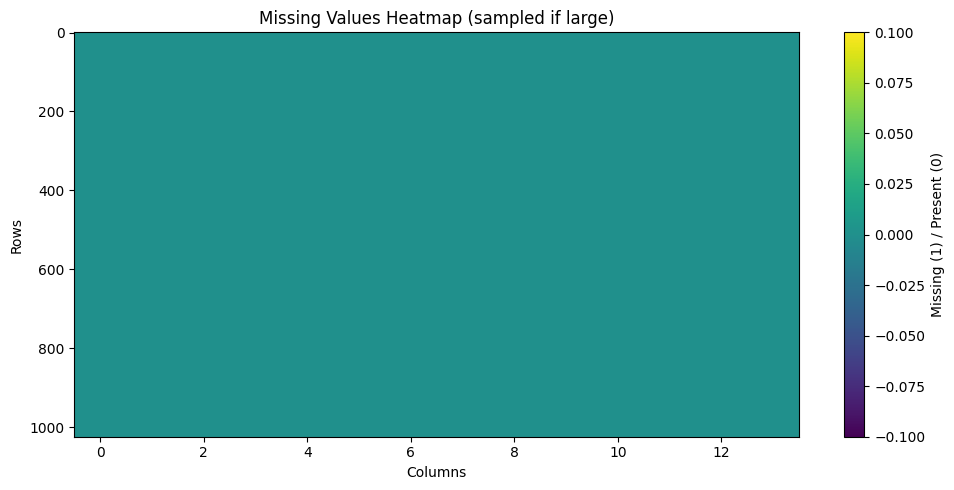

In [173]:
def plot_missing_heatmap(df: pd.DataFrame, max_rows: int = 3000) -> None:
    """
    Plot a simple heatmap of missing values using matplotlib only.
    - 1 means missing, 0 means present.
    - If the dataset is large, it samples up to `max_rows` rows for speed.
    """
    mask = df.isna().astype(int)
    if len(mask) > max_rows:
        mask = mask.sample(n=max_rows, random_state=42)

    plt.figure(figsize=(10, 5))
    plt.imshow(mask.values, aspect="auto", interpolation="nearest")
    plt.colorbar(label="Missing (1) / Present (0)")
    plt.title("Missing Values Heatmap (sampled if large)")
    plt.xlabel("Columns"); plt.ylabel("Rows")
    plt.tight_layout(); plt.show()

plot_missing_heatmap(df)

# 5. Scatter Plot (Age vs Cholesterol)
---
This plot shows the relationship between patients' age and cholesterol level.  
The colors indicate the target class (0 = No heart disease, 1 = Heart disease).  
We can see that patients with similar cholesterol values exist across both classes.

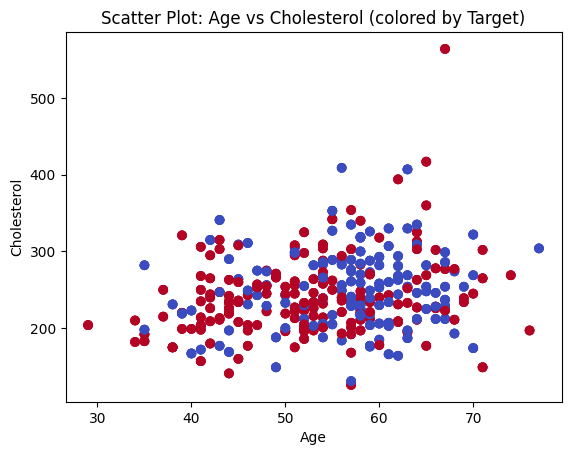

In [174]:


plt.scatter(df['age'],df['chol'],c=df['target'],cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol (colored by Target)')
plt.show()

#6. Distribution of Target (Heart Disease)
---
This bar plot shows the distribution of the target variable.  
There are 526 patients with heart disease (class 1) and 499 without heart disease (class 0).  
The dataset is balanced, which is good for classification.

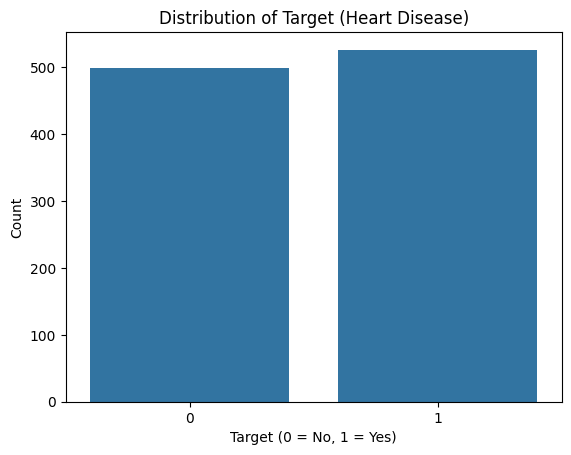

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Distribution of Target (Heart Disease)')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 7. Age Categorization
---
The `categorize_age` function classifies ages into four distinct categories: **youth**, **adult**, **senior**, and **child**.

#### Reason for Application:
- **Improves Interpretability:** Grouping ages into categories simplifies analysis and interpretation, especially for demographic studies.
- **Facilitates Analysis:** It allows for easier comparisons and aggregations within age groups, which can be critical for analysis in health, marketing, or social research.

#### Attribute Affected:
- The `age` column is transformed from continuous numerical values to categorical labels.

In [176]:
# Defining the age discretization algorithm
def categorize_age(age):
    if age >= 14 and age <= 24:
        return 'youth'
    elif age >= 25 and age <= 64:
        return 'adult'
    elif age >= 65:
        return 'senior'
    else:
        return 'child'

# Applying the function
df['age'] = df['age'].apply(categorize_age)


# 8. One-Hot Encoding
---

- **Technique:** The `pd.get_dummies()` function converts the categorical `cp` (chest pain type) column into multiple binary (0/1) columns representing each category.

- **Reason for Application:**
  - **Prevents Ordinal Interpretation:** Ensures the model does not misinterpret categorical data as ordinal.
  - **Enhances Model Performance:** Many machine learning algorithms perform better with numerical inputs, particularly for categorical features.

- **Attribute Affected:** The `cp` column is expanded into multiple binary columns, each representing a category of chest pain.

In [177]:

# One-hot encoding for "cp" column
cp_encoded = pd.get_dummies(df["cp"], prefix="cp")

age_index = df.columns.get_loc("age")

# Insert the new columns after 'age'
for i, col in enumerate(cp_encoded.columns):
    df.insert(age_index + 1 + i, col, cp_encoded[col])

df.drop(columns=["cp"], inplace=True)



# 9. Histogram Description
---
This section visualizes the distribution of key numeric attributes — age, cholesterol, and trestbps — using histograms.
Each histogram displays the frequency of values within intervals, helping identify central tendencies and spread patterns.
The plots reveal that age values are fairly evenly distributed with a slight concentration in middle-aged patients, while cholesterol shows a right-skewed distribution, indicating that most patients have moderate cholesterol levels with a few high values.
Similarly, trestbps (resting blood pressure) clusters around typical healthy ranges, with fewer instances of very high readings.
Overall, histograms provide an intuitive understanding of how patient characteristics are distributed across the dataset.

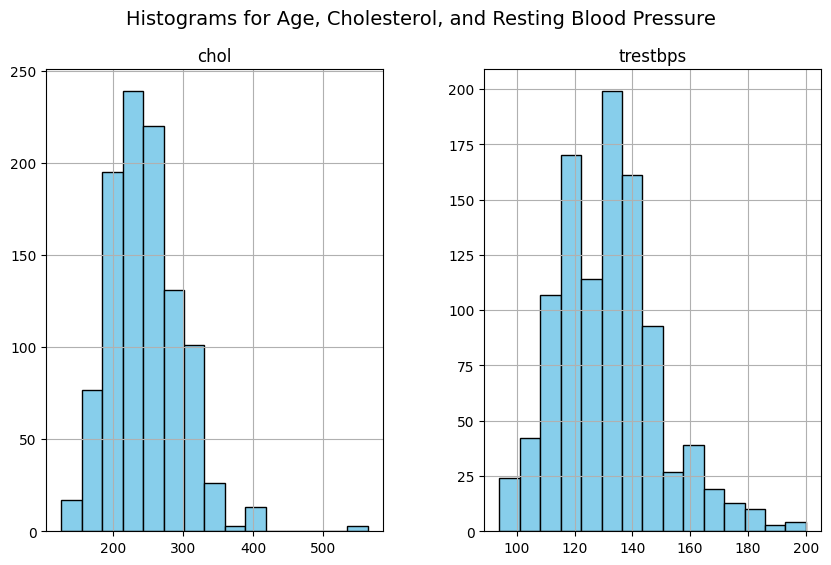

In [178]:


# Required columns
columns = ['age', 'chol', 'trestbps']

# Create the plots
df[columns].hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')

# Add a title
plt.suptitle("Histograms for Age, Cholesterol, and Resting Blood Pressure", fontsize=14)
plt.show()


#10.  Boxplot Description
---
This section illustrates the spread and variability of the same numeric features (age, cholesterol, and trestbps) using boxplots.
Each boxplot summarizes the data through the median, quartiles, and potential outliers.
The age attribute shows a balanced distribution without extreme outliers, whereas cholesterol and trestbps present several higher-end outliers, suggesting that some patients have unusually high cholesterol or blood pressure levels.
The interquartile range (IQR) in all three features highlights data concentration around the median and helps detect potential anomalies for further preprocessing.
Together, the boxplots offer a concise visual summary of the range, variability, and outlier presence within key patient health indicators.

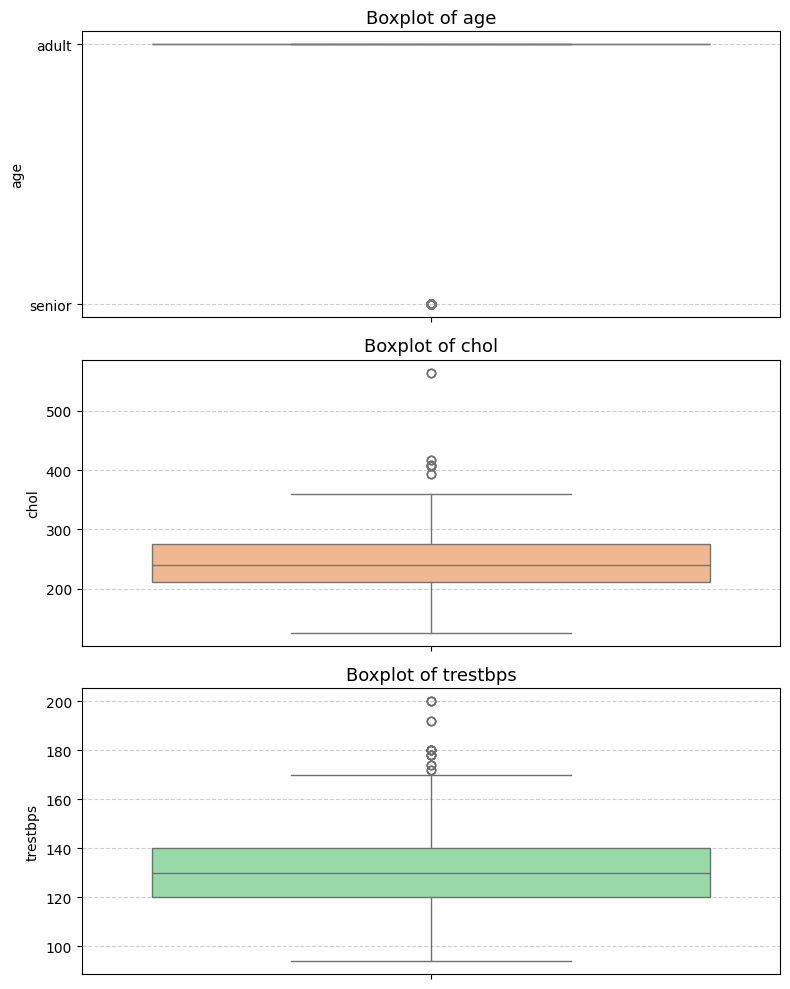

In [179]:
import seaborn as sns


# Required columns
columns = ['age', 'chol', 'trestbps']

# Create the figure
plt.figure(figsize=(8, 10))

# لكل عمود Boxplot رسم
for i, col in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)
    sns.boxplot(y=df[col], color=sns.color_palette("pastel")[i])
    plt.title(f"Boxplot of {col}", fontsize=13)
    plt.ylabel(col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# 11. Bar Plot and Normalization
---
In this section, we visualize the categorical features using bar plots and apply Min-Max normalization on the numerical attributes to bring them into the same scale.


In [180]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# قراءة البيانات الخام
df = pd.read_csv("Raw_dataset.csv")


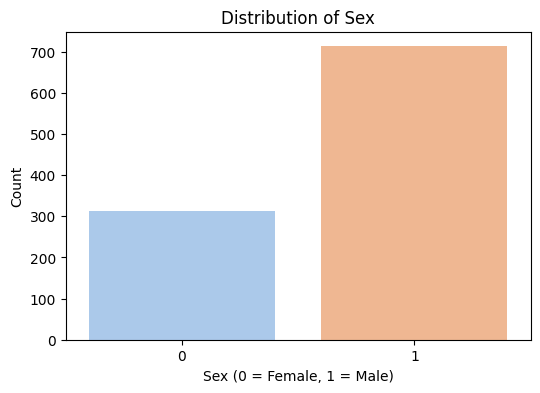

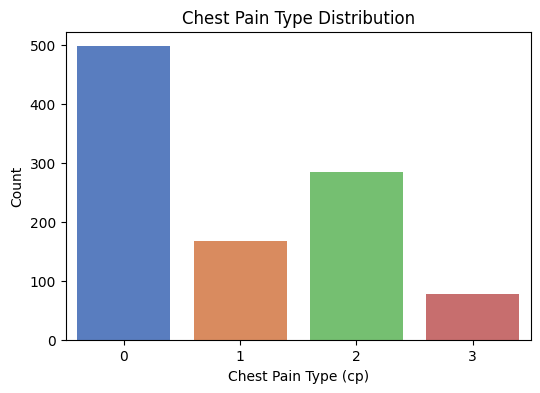

In [181]:
# ===== Bar Plot Section =====
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title("Distribution of Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='cp', data=df, palette='muted')
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.show()


In [182]:
# ===== Normalization Section =====
cols_to_normalize = ['age', 'trestbps', 'chol']

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# تأكيد إن القيم بين 0 و 1
df_normalized[cols_to_normalize].agg(['min','max'])

# عرض أول 5 صفوف بعد التطبيع
df_normalized.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1,168,0,1.0,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,155,1,3.1,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,125,1,2.6,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1,161,0,0.0,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1,106,0,1.9,1,3,2,0
